# Method Mages Present: 
## Home Sweet Loan: Can You Afford Your Dream Home? 

##### By: Erin Smajdek and Lenin Canio

### Introduction

&nbsp; With the rising cost of housing, it can be difficult for families and individuals to afford to own a home. With house prices and inflation seemingly increasing every year, budgeting to purchase a home seems like a daunting task.
<br>
<br>
&nbsp; There is a general rule in finance that one’s housing costs should account for no more than 33% of their household income. We are looking to estimate if one can stay within the 33% allotment given a dataset on home price and income information. We will train our model on this dataset to see what way home prices versus household income are trending in the coming years to find the affordability of owning a home in the United States.

### Data Set
Link to the dataset you want to use and a brief description (100 to 300 words)
<br>
<br>
https://www.kaggle.com/datasets/joshhaber/us-real-estate-incomepriceregion-census-data
<br>
<br>
&nbsp; We are starting with this dataset from Kaggle, which depicts the prices people paid for homes between 2014 - 2022, as well as their relationship to average income. The dataset also provides income information, adjusts for inflation, and accounts for geographical region, average sale price, number of households, median income, and mean income.
<br>
<br>
&nbsp; As with any dataset, we will need to run analysis and perform data cleaning that way, we have a reliable source to train our learning model on. Ideally, this would have been a larger sample size but we are confident that this dataset is a great starting point to train our model as it is objective and we can easily add additional data and run the inflation conversion to generate more information.


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/esmaj234/CST383_Proj/main/RealEstateUnitedStates%202.CSV')

df

,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0
...,...,...,...,...,...,...,...,...,...,...
1570,2014,January,United States,Single,48000.0,124600.0,53660.0,64900.0,75740.0,91610.0
1571,2014,January,United States,Total1,68300.0,124600.0,53660.0,64900.0,75740.0,91610.0
1572,2014,January,West,Double,93900.0,27910.0,57690.0,69780.0,79610.0,96300.0
1573,2014,January,West,Single,55400.0,27910.0,57690.0,69780.0,79610.0,96300.0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              1575 non-null   int64  
 1   Month                             1575 non-null   object 
 2   Region                            1575 non-null   object 
 3   Home Size                         1575 non-null   object 
 4   Average Sales Price               1575 non-null   float64
 5   Number of Households (Thousands)  1575 non-null   float64
 6   Median Income - Current Dollars   1575 non-null   float64
 7   Median Income - 2022 Dollars      1575 non-null   float64
 8   Mean Income - Current Dollars     1575 non-null   float64
 9   Mean Income - 2022 Dollars        1575 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 123.2+ KB


We need to add an afforability column so we can predict if home prices will be within the predetermined 33% of household income. Accourding to Forbes, the average UF first-time home buyer puts 6% down when purchasing a home.

<br>
<br>
https://www.forbes.com/advisor/mortgages/average-down-payment-on-a-house/

In [32]:
# TODO: Add function to calculate the monthly payment based on a 30 year fixed loan (use today's interest rate?)
# TODO: If we want to include region as a predictor, we could create a column with integer values associated to them

after_down_payment = df['Average Sales Price']*0.8

monthly_cost = after_down_payment/(12)

monthly_pay = df['Median Income - Current Dollars']/12

df['afforability'] =  monthly_cost / monthly_pay

df

,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars,afforability
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0,1.579855
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0,0.901054
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0,1.146298
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0,1.575908
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0,0.749627
...,...,...,...,...,...,...,...,...,...,...,...
1570,2014,January,United States,Single,48000.0,124600.0,53660.0,64900.0,75740.0,91610.0,0.715617
1571,2014,January,United States,Total1,68300.0,124600.0,53660.0,64900.0,75740.0,91610.0,1.018263
1572,2014,January,West,Double,93900.0,27910.0,57690.0,69780.0,79610.0,96300.0,1.302132
1573,2014,January,West,Single,55400.0,27910.0,57690.0,69780.0,79610.0,96300.0,0.768244


&nbsp; We will be using the Region, Average Sales Price and Median Income - Current Dollars as our predictors for the model.

&nbsp; We decided to use Median Income in Current Dollars because median will have fewer outliers.

In [33]:

predictors = ['Median Income - Current Dollars',
              'Average Sales Price']

target = 'afforability'
X = df[predictors].values
y = df[target].values

In [34]:
# Split the data into training and test sets, and scale
scaler = StandardScaler()


X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# scaled version
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

TODO: Create line graph of results to see our predicted affordability over time

Let's see how inflation looks...

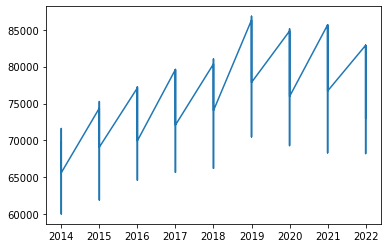

In [35]:
plt.plot(df['Year'], df['Median Income - 2022 Dollars'])
plt.show()